# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [2]:
%run ../tools/algorithms.py
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsII.py
%run ../tools/predictorsIII.py

In [103]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [104]:
training = training.get_close()

In [105]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [106]:
predict = predict.get_close()

In [107]:
def data_prep(df, input_batch_size, future_horizon):
    input_b = df[0:input_batch_size]
    real_value = df[input_batch_size:input_batch_size + future_horizon]
    
    return input_b, real_value

In [108]:
# future_horizon = length -> days into the future predicted
def individual_predictors(training_df, input_batch, future_horizon):
    one = HybridUnivariatePredictor(training_df,2, len(input_batch), future_horizon)
    one.create_cnnlstm()
    one.fit_model(10)
    one.show_performance()
    
    two = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    two.create_bilstm()
    two.fit_model(10)
    two.show_performance()
    
    
    three = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    three.create_cnn()
    three.fit_model(10)
    three.show_performance()
    
    prediction_one = one.predict(input_batch)
    prediction_two = two.predict(input_batch)
    prediction_three = three.predict(input_batch)
    
    return prediction_one, prediction_two, prediction_three

In [110]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 0s 21ms/step - loss: 28.9595 - mean_squared_error: 28.9595 - val_loss: 36.8165 - val_mean_squared_error: 36.8165
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 14.9779 - mean_squared_error: 14.9779 - val_loss: 17.9937 - val_mean_squared_error: 17.9937
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 6.9733 - mean_squared_error: 6.9733 - val_loss: 7.1557 - val_mean_squared_error: 7.1557
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 2.4990 - mean_squared_error: 2.4990 - val_loss: 2.4151 - val_mean_squared_error: 2.4151
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.7694 - mean_squared_error: 0.7694 - val_loss: 0.8438 - val_mean_squared_error: 0.8438
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.2354 - mean_squared_error: 0.2354 - val_loss: 0.4431 - val_mean_squared_error: 0.4431
Epoch 7/10
23/23 [=============

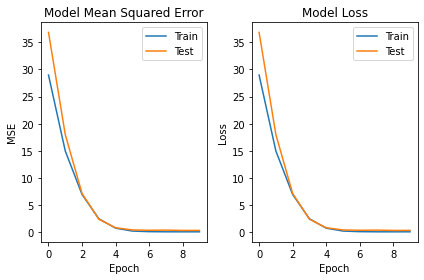

Epoch 1/10
23/23 [==============================] - 1s 41ms/step - loss: 27.0088 - mean_squared_error: 27.0088 - val_loss: 27.5493 - val_mean_squared_error: 27.5493
Epoch 2/10
23/23 [==============================] - 0s 20ms/step - loss: 8.9004 - mean_squared_error: 8.9004 - val_loss: 4.7369 - val_mean_squared_error: 4.7369
Epoch 3/10
23/23 [==============================] - 0s 20ms/step - loss: 1.2249 - mean_squared_error: 1.2249 - val_loss: 0.7078 - val_mean_squared_error: 0.7078
Epoch 4/10
23/23 [==============================] - 0s 19ms/step - loss: 0.3112 - mean_squared_error: 0.3112 - val_loss: 0.6022 - val_mean_squared_error: 0.6022
Epoch 5/10
23/23 [==============================] - 0s 19ms/step - loss: 0.1624 - mean_squared_error: 0.1624 - val_loss: 0.4872 - val_mean_squared_error: 0.4872
Epoch 6/10
23/23 [==============================] - 0s 18ms/step - loss: 0.1657 - mean_squared_error: 0.1657 - val_loss: 0.5687 - val_mean_squared_error: 0.5687
Epoch 7/10
23/23 [============

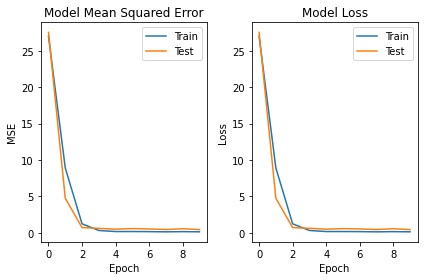

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 24.3327 - mean_squared_error: 24.3327 - val_loss: 22.8983 - val_mean_squared_error: 22.8983
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 6.6947 - mean_squared_error: 6.6947 - val_loss: 3.8186 - val_mean_squared_error: 3.8186
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.7878 - mean_squared_error: 0.7878 - val_loss: 0.5101 - val_mean_squared_error: 0.5101
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 0.3878 - val_mean_squared_error: 0.3878
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.3463 - val_mean_squared_error: 0.3463
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.4067 - val_mean_squared_error: 0.4067
Epoch 7/10
23/23 [==================

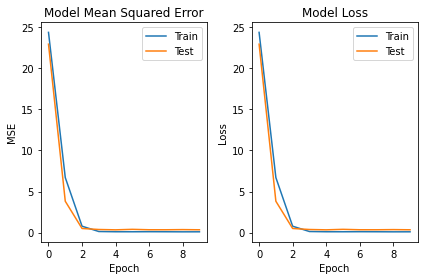

In [111]:
A, B, C = individual_predictors(training, predict_req, 30)

In [112]:
predict_req

,Close
Date,
2010-06-01,9.315357
2010-06-02,9.426786
2010-06-03,9.397143
2010-06-04,9.141429
2010-06-07,8.962143
2010-06-08,8.904643
2010-06-09,8.685714
2010-06-10,8.946786
2010-06-11,9.053929


In [113]:
real

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [114]:
final_df = pd.concat([A, B, C], axis=1)

In [115]:
final_df

,CNN-LSTM,Bidirectional LSTM,CNN
0,8.931520,8.093163,9.356875
1,8.910427,8.318751,9.497316
2,8.855814,8.455762,9.533995
3,8.779542,8.280294,9.609003
4,8.568912,9.504839,9.525154
5,9.286200,7.925384,9.703090
6,8.920964,8.114044,9.726534
7,8.952649,8.432811,9.574721
8,8.452676,9.191630,9.720705
9,9.087454,8.245411,9.616981


### System Disagreement

In [116]:
def system_disagreement(df):
    disagreement(df).plot()
    predictor_score(df).plot()

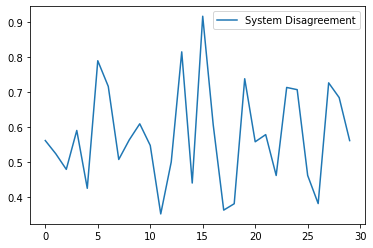

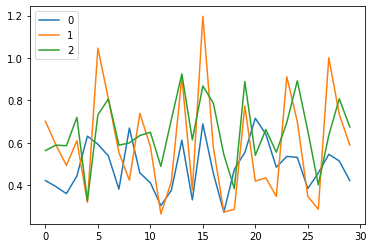

In [117]:
system_disagreement(final_df)

In [118]:
disagreement(final_df)

,System Disagreement
0,0.561650
1,0.523807
2,0.479215
3,0.590537
4,0.424997
5,0.790092
6,0.716662
7,0.507516
8,0.563569
9,0.609587


In [119]:
predictor_score(final_df)

,0,1,2
0,0.421237,0.700690,0.563022
1,0.392855,0.590080,0.588485
2,0.359411,0.492762,0.585471
3,0.442903,0.609319,0.719390
4,0.630723,0.318748,0.325519
5,0.592569,1.046174,0.731532
6,0.537497,0.806470,0.806020
7,0.380637,0.553916,0.587994
8,0.668995,0.422676,0.599035
9,0.457190,0.737871,0.633699


### System consensus

In [120]:
def consensus(df, real):
    consensus = pd.DataFrame()
    
    average = average_consolidation(final_df)
    nomemory = consolidated_predictions(final_df, real)
    memory = consolidated_predictions_memory(final_df, real)
    focus = consolidated_predictions_focused(final_df, real)
    anchor = consolidated_predictions_anchor(final_df, real, 1.5)
    
    consensus['Average'] = average
    consensus['NoMemory'] = nomemory
    consensus['Memory'] = memory
    consensus['Focus'] = focus
    consensus['Anchor'] = anchor
    
    return consensus

In [121]:
algos = consensus(final_df, real)

In [122]:
performance = real.copy()

In [123]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,8.793853,8.793853,8.793853,8.793853,8.892691
1,8.908832,8.978443,8.943637,8.910427,8.958910
2,8.948524,9.058646,8.999540,9.533995,9.052638
3,8.889613,8.985545,8.961068,9.609003,8.994052
4,9.199635,9.171722,9.148524,9.525154,9.221435
5,8.971558,8.928109,9.085555,7.925384,9.026162
6,8.920514,8.990114,9.006858,8.920964,8.988131
7,8.986727,9.014935,9.041845,8.952649,9.013374
8,9.121670,8.961014,9.079465,8.452676,9.120496
9,8.983282,8.867067,9.035077,8.245411,8.954163


In [124]:
real_value = real.copy()
real_value

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [127]:
def evaluation_frame(algorithms, real_df):
    algorithms = algorithms.set_index(real_df.index)
    algorithms['Real Value'] = real_df
    
    return algorithms

In [129]:
evaluation = evaluation_frame(algos, real_value)

In [134]:
evaluation2 = evaluation_frame(final_df, real_value)

In [135]:
evaluation2

,CNN-LSTM,Bidirectional LSTM,CNN,Real Value
Date,,,,
2010-07-06,8.931520,8.093163,9.356875,8.879643
2010-07-07,8.910427,8.318751,9.497316,9.238214
2010-07-08,8.855814,8.455762,9.533995,9.217500
2010-07-09,8.779542,8.280294,9.609003,9.272143
2010-07-12,8.568912,9.504839,9.525154,9.188929
2010-07-13,9.286200,7.925384,9.703090,8.992857
2010-07-14,8.920964,8.114044,9.726534,9.026071
2010-07-15,8.952649,8.432811,9.574721,8.980357
2010-07-16,8.452676,9.191630,9.720705,8.925000


In [140]:
def calculate_error_predictors(data):
    error = data.copy()
    
    error['Error CNN-LSTM'] = abs(error['Real Value'] - error['CNN-LSTM'])
    error['Error Bidirectional LSTM'] = abs(error['Real Value'] - error['Bidirectional LSTM'])
    error['Error CNN'] = abs(error['Real Value'] - error['CNN'])
    
    return error

In [142]:
nice1 = calculate_error_predictors(evaluation2)

In [151]:
#nice1['Error CNN-LSTM'].sum()
#nice1['Error Bidirectional LSTM'].sum()
#nice1['Error CNN'].sum()

9.469642639160156

In [130]:
def calculate_error_algorithms(data):
    error = data.copy()
    
    error['Error Average'] = abs(error['Real Value'] - error['Average'])
    error['Error NoMemory'] = abs(error['Real Value'] - error['NoMemory'])
    error['Error Memory'] = abs(error['Real Value'] - error['Memory'])
    error['Error Focus'] = abs(error['Real Value'] - error['Focus'])
    error['Error Anchor'] = abs(error['Real Value'] - error['Anchor'])
    
    return error



In [131]:
nice = calculate_error_algorithms(evaluation)

In [157]:
nice['Error Average'].sum()
nice['Error NoMemory'].sum()
nice['Error Memory'].sum()
nice['Error Focus'].sum()
nice['Error Anchor'].sum()

6.183447077426274

In [132]:
def plot_performance(data):

    plt.plot(data['Real Value'])
    plt.plot(data['Average'])
    plt.title('Average Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['NoMemory'])
    plt.title('NoMemory Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Memory'])
    plt.title('Memory Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Focus'])
    plt.title('Focus Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Anchor'])
    plt.title('Anchor Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    


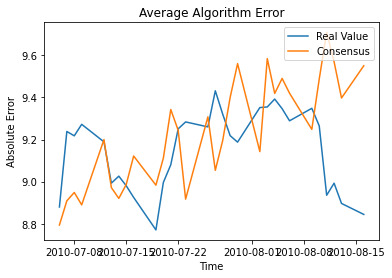

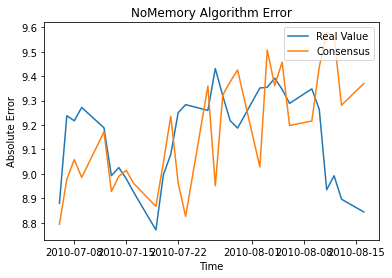

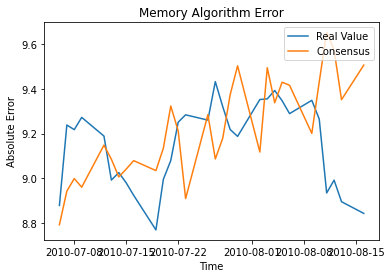

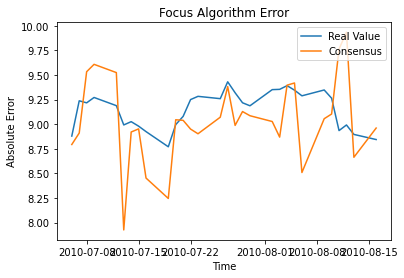

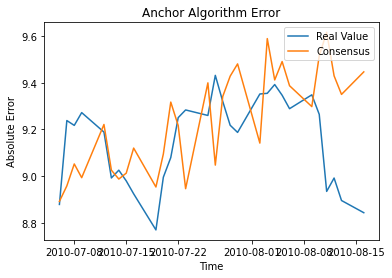

In [133]:
plot_performance(nice)